In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
trainData = pd.read_excel('Data_Train.xlsx')
testData = pd.read_excel('Test_set.xlsx')

In [96]:
testData

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [97]:
bigdf = trainData.append(testData, sort =False)

In [98]:
bigdf['Day'] = bigdf['Date_of_Journey'].str.split('/').str[0]
bigdf['Month'] = bigdf['Date_of_Journey'].str.split('/').str[1]
bigdf['Year'] = bigdf['Date_of_Journey'].str.split('/').str[2]

In [99]:
bigdf = bigdf.drop('Date_of_Journey', axis=1)

In [100]:
bigdf['Arrival_Time'] = bigdf['Arrival_Time'].str.split(" ").str[0]

In [101]:
bigdf['Total_Stops'].isna().sum()

1

In [102]:
bigdf[bigdf['Total_Stops'].isna()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,05,2019


In [103]:
bigdf['Total_Stops'] = bigdf['Total_Stops'].fillna('1 stop')

In [104]:
bigdf['Total_Stops'].isna().sum()

0

In [105]:
bigdf['Total_Stops'].head()

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: object

In [106]:
bigdf['Total_Stops'] = bigdf['Total_Stops'].replace('non-stop','0 stop')

In [107]:
non_StopCount = [stop for stop in  bigdf['Total_Stops'] if stop == 'non-stop']

In [108]:
print(len(non_StopCount))

0


In [109]:
bigdf['Total_Stops'].unique()

array(['0 stop', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [110]:
bigdf['Stop'] = bigdf['Total_Stops'].str.split(' ').str[0]

In [111]:
bigdf['Stop'].unique()

array(['0', '2', '1', '3', '4'], dtype=object)

In [112]:
bigdf['Stop'] = bigdf['Stop'].astype(int)

In [113]:
bigdf['Stop'].dtype

dtype('int64')

In [114]:
bigdf = bigdf.drop('Total_Stops', axis = 1)

In [115]:
bigdf['Arrival_Hour'] = bigdf['Arrival_Time'].str.split(':').str[0]
bigdf['Arrival_Minute'] = bigdf['Arrival_Time'].str.split(':').str[1]

In [116]:
bigdf = bigdf.drop('Arrival_Time', axis = 1)

In [117]:
bigdf['Arrival_Hour'] = bigdf['Arrival_Hour'].astype(int)
bigdf['Arrival_Minute'] = bigdf['Arrival_Minute'].astype(int)

In [118]:
bigdf.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Additional_Info     object
Price              float64
Day                 object
Month               object
Year                object
Stop                 int64
Arrival_Hour         int64
Arrival_Minute       int64
dtype: object

In [119]:
bigdf['Day'] = bigdf['Day'].astype(int)
bigdf['Month'] = bigdf['Month'].astype(int)
bigdf['Year'] = bigdf['Year'].astype(int)

In [120]:
bigdf.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Duration            object
Additional_Info     object
Price              float64
Day                  int64
Month                int64
Year                 int64
Stop                 int64
Arrival_Hour         int64
Arrival_Minute       int64
dtype: object

In [121]:
bigdf['Departure_Hour'] = bigdf['Dep_Time'].str.split(':').str[0]
bigdf['Departure_Minute'] = bigdf['Dep_Time'].str.split(':').str[1]

In [122]:
bigdf['Departure_Hour'] = bigdf['Departure_Hour'].astype(int)
bigdf['Departure_Minute'] = bigdf['Departure_Minute'].astype(int)
bigdf  = bigdf.drop('Dep_Time', axis = 1)

In [123]:
bigdf['Route_1'] = bigdf['Route'].str.split('→').str[0]
bigdf['Route_2'] = bigdf['Route'].str.split('→ ').str[1]
bigdf['Route_3'] = bigdf['Route'].str.split('→ ').str[2]
bigdf['Route_4'] = bigdf['Route'].str.split('→ ').str[3]
bigdf['Route_5'] = bigdf['Route'].str.split('→ ').str[4]

In [124]:
bigdf['Price'].isnull().sum()

2671

In [125]:
bigdf['Price'].fillna(bigdf['Price'].mean(), inplace = True)

In [126]:
bigdf['Price'].isna().sum()

0

In [127]:
bigdf

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Day,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,NaN,NaN
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,NaN,NaN,NaN
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,NaN,NaN
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,NaN,NaN


In [128]:
bigdf['Route_1'].fillna('None', inplace = True)
bigdf['Route_2'].fillna('None', inplace = True)
bigdf['Route_3'].fillna('None', inplace = True)
bigdf['Route_4'].fillna('None', inplace = True)
bigdf['Route_5'].fillna('None', inplace = True)

In [129]:
bigdf = bigdf.drop('Route', axis = 1)

In [130]:
bigdf

,Airline,Source,Destination,Duration,Additional_Info,Price,Day,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,2h 35m,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,6h 35m,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,15h 15m,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,None,None


In [131]:
bigdf = bigdf.drop('Duration', axis =1)

In [132]:
bigdf.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Day                   int64
Month                 int64
Year                  int64
Stop                  int64
Arrival_Hour          int64
Arrival_Minute        int64
Departure_Hour        int64
Departure_Minute      int64
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
dtype: object

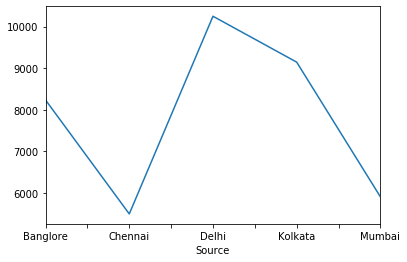

In [133]:
bigdf.groupby('Source')['Price'].mean().plot()

In [134]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()
bigdf['Airline'] = lblencoder.fit_transform(bigdf['Airline'])
bigdf['Source'] = lblencoder.fit_transform(bigdf['Source'])
bigdf['Destination'] = lblencoder.fit_transform(bigdf['Destination'])
bigdf['Additional_Info'] = lblencoder.fit_transform(bigdf['Additional_Info'])
bigdf['Route_1'] = lblencoder.fit_transform(bigdf['Route_1'])
bigdf['Route_2'] = lblencoder.fit_transform(bigdf['Route_2'])
bigdf['Route_3'] = lblencoder.fit_transform(bigdf['Route_3'])
bigdf['Route_4'] = lblencoder.fit_transform(bigdf['Route_4'])
bigdf['Route_5'] = lblencoder.fit_transform(bigdf['Route_5'])

In [135]:
bigdf

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.000000,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.000000,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.000000,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.000000,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.000000,1,3,2019,1,21,35,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,25,20,30,2,14,3,12,4
2667,3,3,0,8,9087.064121,27,3,2019,0,16,55,14,20,2,5,24,12,4
2668,4,2,1,8,9087.064121,6,3,2019,1,4,25,21,50,3,7,6,12,4
2669,1,2,1,8,9087.064121,6,3,2019,1,19,15,4,0,3,7,6,12,4
